In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 데이터 소개

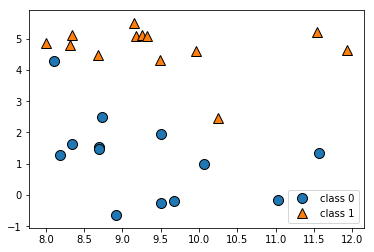

In [30]:
# 예제에 사용할 데이터 셋 (forge)
# 인위적으로 만든 이진 분류 데이터 셋
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)

Text(0.5,0,'attribute')

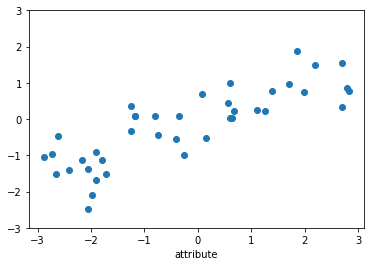

In [5]:
# 예제에 사용할 데이터 셋 (wave)
# 주로 회귀 알고리즘 설명에 사용함
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('attribute')

In [6]:
# 예제에 사용할 데이터 셋 (breast_cancer)
# 유방암 종양 데이터로, 종양은 양성, 음성으로 분류됨 (데이터 569개, 특성은 30개)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))
print('sample count of each class: \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('features: \n{}'.format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
sample count of each class: 
{'malignant': 212, 'benign': 357}
features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
# 보스턴 주택 가격 데이터 (데이터 506개, 특성 13개)
# 특성에 수를 104개까지 늘릴 수 있음 (feature engineering)
from sklearn.datasets import load_boston
boston = load_boston()
print("{}".format(boston.data.shape))
X, y= mglearn.datasets.load_extended_boston()
print("{}".format(X.shape))

(506, 13)
(506, 104)


# 분류 모델 (k-최근접 이웃)

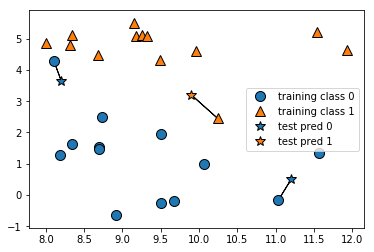

In [7]:
# K-최근접 이웃 분류 (mglearn)
mglearn.plots.plot_knn_classification(n_neighbors=1)

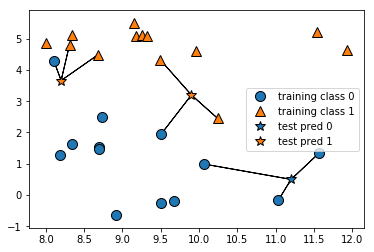

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
# forge 데이터
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print('X test: {}'.format(clf.predict(X_test)))
print("{:0.2f}".format(clf.score(X_test, y_test)))

X test: [1 0 1 0 1 0 0]
0.86


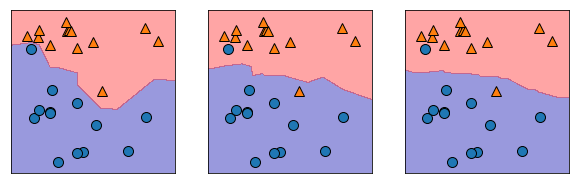

In [10]:
# K-최근접 이웃 분석 (파라미터 1,3,9)
# 파라미터가 작을수록 훈련 데이터에 적합한 모델을 만듦 (과적합)
# 파라미터가 커질수록 단순한 모델로 만듦 (일반화)
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

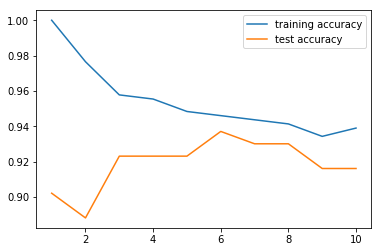

In [11]:
# 파라미터를 1~11로 조정
# 파라미터가 1개일 땐 모델을 너무 복잡하게 만들어 과적합
# 파라미터가 10개 일땐 모델을 너무 단순화 해서 정확도가 더 나빠짐 
# 파라미터 6일 때 테스트 정확도가 가장 좋은걸 보여줌 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()

# 중요한 매개면수는 두 개
 # - 거리 계산 (대표적으로 유클리디안 거리)
 # - 이웃의 수
# k_NN은 이해하기 쉬우며, 간단한 모델이기에 복잡한 알고리즘을 적용하기 전에 시도할 수 있는 좋은 모델임
# 하지만, 데이터가 많으면 예측이 느리며, 특성(feature)이 많은 데이터 셋에는 잘 동작하지 못함 (데이터 전처리 과정이 중요함)
# 현업에서는 잘 쓰지 않음

# K-최근접 이웃은 회귀 분석도 가능함 (KNeighborsRegressor)

# 분류 모델 (선형 모델)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


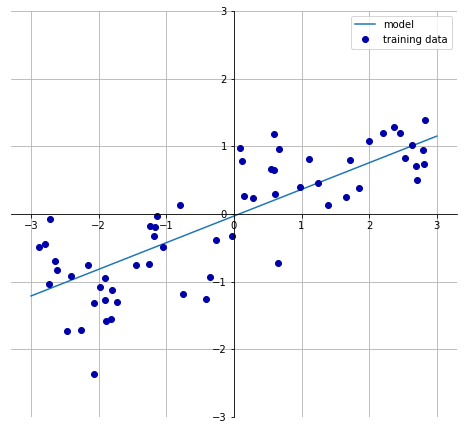

In [12]:
# training data들의 선형 모델을 만듦
mglearn.plots.plot_linear_regression_wave()

# K-nn과 비교했을 시 직선을 사용한 예측이 더 제약이 많아보이지만, feature가 많은 데이터 셋에 더 유리한 성능을 보임
# 선형 모델이 학습할 두 파라미터: w(기울기), b(y절편)

In [13]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

# 기울기(w) --> coef: 가중치 or 계수
# y절편 (b) --> intercept: 편향 or 절편
# intercept는 항상 실수 하나의 값, coef는 각 feature 당 대응되는 numpy 배열
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))
print('training set point {}'.format(lr.score(X_train, y_train)))
print('test set point {}'.format(lr.score(X_test, y_test)))
# 좋은 결과는 아니지만, training과 test의 값이 거의 유사함 (과소 적합)
# 1차원 데이터셋에서는 모델이 매우 단순해, 과대 적합에 대한 걱정은 없음

lr.coef_: [0.39390555]
lr.intercept: -0.031804343026759746
training set point 0.6700890315075756
test set point 0.65933685968637


In [14]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))
print('training set point {}'.format(lr.score(X_train, y_train)))
print('test set point {}'.format(lr.score(X_test, y_test)))
# feature의 수가 105개. 즉, 고차원 데이터 셋에선 선형 모델의 성능이 매우 높아져 과대 적합될 가능성이 높아짐
# 모델의 과대적합을 막기 위해, 복잡도를 제어할 수 있는 모델을 사용해야함 (Ridge)

lr.coef_: [-4.75050668e+02  7.66248976e+00 -9.55383040e+01  1.33708435e+01
  3.77399151e+01  6.14571931e+01  3.45207050e+01 -1.20844469e+00
  2.89411288e+00  7.97381567e+01  1.39184091e+01  3.75868123e+01
 -2.73954567e+00  1.60075207e+01  6.71246566e+02  1.42025664e+03
  2.32122643e+02 -8.92062028e+01  6.87533012e+01 -4.98496442e+00
  5.87818767e+01  7.52035243e+02 -1.81075008e+03  5.21676580e+02
 -1.80410932e+01  1.00731434e+02 -4.26622200e+00 -1.21271166e+01
 -3.70329436e+00 -5.58361945e+01 -7.08769204e-02  8.51265643e+00
 -2.05278198e+01 -3.58234147e+01  4.25566751e+01 -3.35963152e+00
  1.13184946e+01 -3.25999376e+01  3.72859479e+01 -2.14650482e+00
  7.37428237e+00  4.88105086e+01  6.75839169e+00  4.21110920e+01
 -7.85387669e+00 -1.98976150e+00 -3.41928334e+00  3.34194555e+01
 -1.60278024e+01  1.33708435e+01 -1.80036506e+01 -2.86117967e+01
 -2.85803880e+00 -1.04759665e+01  1.25916205e+00 -1.47486907e+00
 -7.72662500e+00  5.87470216e+00 -1.07311658e+01 -2.76760525e+01
 -1.43596730e+0

In [15]:
# Ridge 모델
# 선형 회귀 모델은 feature가 많은 데이터 셋엔 과대적합이지만, Ridge는 덜 자유로운 모델이기에 과대적합이 줄어듦
# 선형 모델에 규제를 주어 과대적합이 되지 않도록 모델을 강제로 제한함 (L2 규제)
# 기본 파라미터 alpha = 1
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('training set point {}'.format(ridge.score(X_train, y_train)))
print('test set point {}'.format(ridge.score(X_test, y_test)))

# 알파 값을 높이면 계수를 0에 더 가깝게 만들어 더욱 일반화 할 수 있음
ridge = Ridge(alpha=10).fit(X_train, y_train)
print('training set point {}'.format(ridge.score(X_train, y_train)))
print('test set point {}'.format(ridge.score(X_test, y_test)))

training set point 0.8703751958973934
test set point 0.8140998031853133
training set point 0.7670498825472767
test set point 0.7277573511985337


In [16]:
# Laso 모델
# 선형 회귀에 규제에 적용하는데 Ridge의 대안인 방법
# Ridge 회귀와 마찬가지로, 계수를 0에 가깝게 만드려고 함. (선형 모델의 규제를 위함)
# Laso 모델은 완전히 제외되는 특성이 생길 수 있음. 즉, feature selection이 자동으로 이뤄질 수 있음 (L1 규제)
# alpha 값을 너무 높이면, 규제가 심해지기 때문에 모델이 일반화가 심해짐 (과소 적합)
# alpha 값이 너무 낮으면, 규제가 없어저 모델이 복잡해집 (과대 적합)
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)

print("{:.2f}".format(lasso.score(X_train, y_train)))
print("{:.2f}".format(lasso.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("{:.2f}".format(lasso001.score(X_train, y_train)))
print("{:.2f}".format(lasso001.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso001.coef_ != 0)))

lasso002 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("{:.2f}".format(lasso002.score(X_train, y_train)))
print("{:.2f}".format(lasso002.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso002.coef_ != 0)))

# 실제 Ridge,Laso 중 Ridge를 좀 더 선호함. 하지만, 특성이 많고 그중 일부분만 중요하다면 Laso를 사용
# 또한, 분석하기 쉬운 모델을 만들고 싶다면 Laso (feature selection)
# scikit-learn은 이 둘의 장점을 조합한 ElasticNet도 제공함 

0.29
0.21
using features:4
0.90
0.77
using features:33
0.95
0.64
using features:94


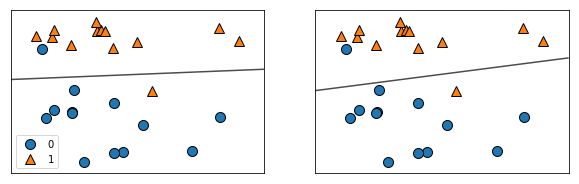

In [17]:
# 이진 분류형 선형 모델 (Logistic Regression, Support Vector Machine)
# 둘의 결과는 비슷. 두 모델은 기본적으로 L2 규제를 사용함
# 규제의 강도를 결정하는 것은 파라미터 C
# C가 높아지면 규제가 감소, C가 낮아지면 규제가 심해짐
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
axes[0].legend()

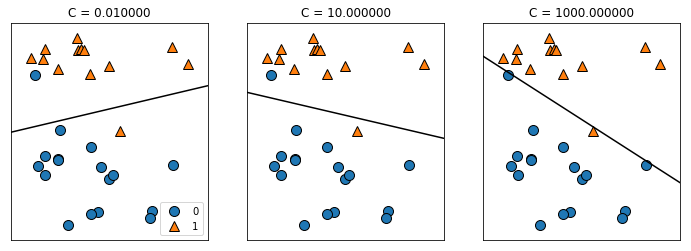

In [18]:
mglearn.plots.plot_linear_svc_regularization()

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target ,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("training set point {}".format(logreg.score(X_train, y_train)))
print("test set point {}".format(logreg.score(X_test, y_test)))
# 성능은 매우 좋지만, 훈련, 테스트셋이 매우 비슷해 과소 적합으로 보임

logreg = LogisticRegression(C=100).fit(X_train, y_train)
print("training set point {}".format(logreg.score(X_train, y_train)))
print("test set point {}".format(logreg.score(X_test, y_test)))
# 파라미터 조절을 통해 과소 적합을 해소할 수 있음

training set point 0.9553990610328639
test set point 0.958041958041958
training set point 0.971830985915493
test set point 0.965034965034965


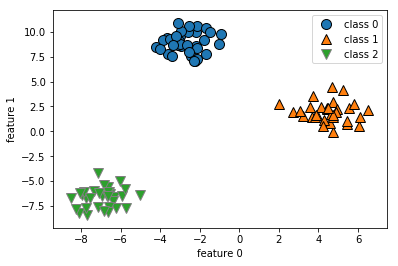

In [20]:
# 다중 클래스 분류용 선형 모델
# 로지스틱 회귀를 제외하고, 대부분의 선형 모델은 이진 분류만 지원함.
# 그래서, 이진 분류 방법을 다중 클래스 분류 방법으로 확장하는 일대다 방법을 사용함
# 클래스의 수 만큼 이진 분류 모델을 만드는 것 (여기선 3개)
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

coef{} (3, 2)
intercept{} (3,)


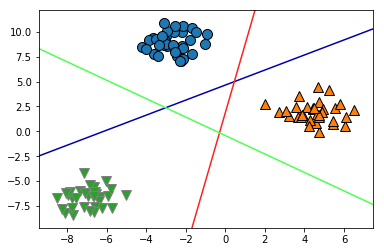

In [21]:
linear_svm = LinearSVC().fit(X, y)
print('coef{}', linear_svm.coef_.shape)
print('intercept{}', linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# 정가운데 있는 데이터는 가장 직선에 가까운 클래스로 구분이 됨
# 세 개의 일대다 분류기가 만든 다중 클래스
# 마찬가지로 C 값이 작을수록 모델을 단순화 할 수 있음.
# L1, L2 규제를 사용할지 정해야 함. 중요한 feature가 많지 않다고 생각하면 L1 규제를 사용
# 그렇지 않다면, 기본적으로 L2 규제를 이용함

# 선형 모델의 장점
# 1. 학습 속도가 빠르고, 예측도 빠르다. 
# 2. 매우 큰 데이터 셋과 희소환 데이터 셋에도 잘 동작하며 예측이 어떻게 만들어지는지 쉽게 이해할 수 있음
# 3. feature가 많은 경우 선형 모델을 많이 사용하지만, 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 높음 (즉, 저차원 데이터 셋엔 일반화 성능이 떨어짐)

# 나이브 베이즈 분류

In [22]:
# 나이브 베이즈는 선형 모델과 매우 유사함
# 로지스틱 회귀, LinearSVC와 같은 선형 분류기보다 훈련 속도는 빠르지만, 일반화 성능이 조금 뒤짐
# 나이브 베이즈는 각 feature를 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합함 (장점)
# GaussianNB 연속적인 데이터에 적용, BernoulliNB 이진 데이터, MultinomialNB 카운트 데이터

# 나이브 베이즈 모델은 선형 모델의 장단점은 비슷함. 하지만, 선형 모델로 학습 시간이 오래 걸리는 매우 큰 데이터셋은 나이브 베이즈 모델로 종종 사용됨
# (선형 모델도 학습 속도가 빠르지만, 나이브 베이즈는 좀 더 빠름?)

# 결정 트리 분류/회귀

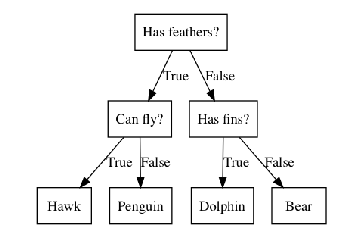

In [26]:
# 결정 트리는 예/아니오 질문을 이어나가며 학습함
mglearn.plots.plot_animal_tree()

In [38]:
# 데이터를 분할하는 것은 각 분할된 영역이 한개의 타깃값(하나의 클래스)를 가질 때 까지 반복함.
# 여기서 타깃 하나로만 이루어진 노드를 순수 노드라 함
# 결정 트리는 모든 노드를 순수 노드로 만들 때 까지, 학습을 진행함 (즉, 모델이 매우 복잡해짐 - 과대적합)

# 결정 트리에서 과대 적합을 막는 전략 2가지
# 1. 트리 생성을 일찍 중단 하는 전략 (사전 가지치기) --> 트리의 최대 깊이, 리프의 최대 개수를 제한
# 2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제, 병합 (사후 가지치기)
# scikit-learn에선 사전 가지치기만 제공함
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set point {}".format(tree.score(X_train, y_train)))
print("test set point {}".format(tree.score(X_test, y_test)))

# 가치 치기를 통해 일반화 할 수 있음
# 가치 치기를 안하면, 모든 노드가 순수 노드가 될 때까지 노드를 분할하기 때문에, 과대적합이 됨
tree = DecisionTreeClassifier(max_depth=4, random_state = 0)
tree.fit(X_train, y_train)
print("training set point {}".format(tree.score(X_train, y_train)))
print("test set point {}".format(tree.score(X_test, y_test)))

training set point 1.0
test set point 0.9370629370629371
training set point 0.9882629107981221
test set point 0.951048951048951


feature importance [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01063382 0.0504697
 0.         0.         0.         0.         0.         0.
 0.         0.         0.75793681 0.03465357 0.         0.
 0.         0.         0.01896644 0.12733965 0.         0.        ]


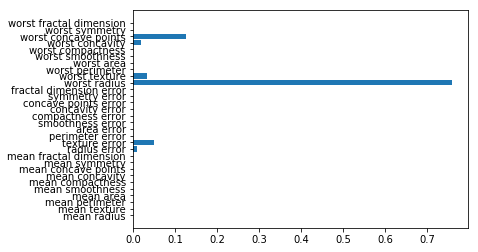

In [41]:
# 특성의 중요도를 나타낼 수 있음 (feature importance)
# 여기선 worst radius가 두 클래스를 잘 나누고 있는 것을 나타냄 
# (1에 가까울 수록 완벽하게 타깃 클래스를 예측한다는 의미, 0에 가까울 수록 전혀 사용되지 않았음)
# 하지만, 값이 낮다고해서 feature가 유용하지 않다는 것은 아님. 단지 생성한 트리가 그 특성을 선택하지 않은 것
# 또한, worst radius는 중요하다고 알려주지만, 높은 radius값이 class 1,0 인지 알 수 없음. 
# 즉 특성의 중요도가 어떤 클래스를 지지하는지는 알려주지 않음
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
tree = DecisionTreeClassifier(max_depth=3, random_state = 0)
tree.fit(X_train, y_train)
print("feature importance {}".format(tree.feature_importances_))
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


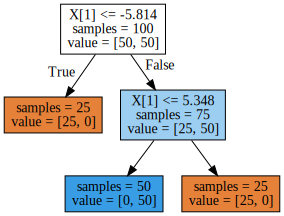

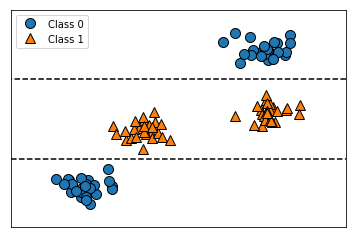

In [29]:
# feature와 class 사이에 관계
# 두 종류의 feature가 있을 때, 여기서 X[1]만으로 class를 구분할 수 있음. X[0]은 사용하지 않음
# 하지만, X[1]이 높으면 class 0, 낮으면 1이라고도 말할 수 없음
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 트리 모델의 장점
# 1. 만들어진 모델을 쉽게 시각화해 비전문가도 쉽게 이해할 수 있음 (비교적 작은 트리)
# 2. 데이터 스케일에 구애받지 않음 (feature의 정규화, 표준화 같은 전처리 과정이 필요 없음)
# 트리 모델의 단점
# 1. 사전 가지치기를 사용함에도 과대적합하는 경향이 있어, 일반화 성능이 좋지 않음. 그래서 이를 해결하기 위해 앙상블 방법을 이용함

In [ ]:
# SVM 